In [1]:
import pandas as pd
import seaborn as sns
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
from datetime import datetime
import whois
import time
from urllib.parse import urlparse
import validators
import bs4
import socket

# 🎯 Goal Definition: Malicious URL Detector 🎯

As the first step of the engineering process that will guide our entire work, it's necessary to state our specific goal we were committed to achieve, which is a ML-Enhanced tool we defined as "Malicious URL Detector". Malicious URLs, also known as abnormal or suspicious URLs, are web addresses that exhibit characteristics or behaviors indicative of malicious intent or deceptive practices. These URLs are often associated with phishing attacks, malware distribution, or other cyber threats. Some common characteristics of malicious URLs are:

1. **Misspelled Domain Names**: Cybercriminals often register domains that are intentionally similar to well-known websites, but contain slight misspellings or variations (e.g., goo-gle.com instead of google.com).

2. **IP Addresses Instead of Domains**: Some malicious URLs use raw IP addresses instead of domain names to bypass domain registration requirements. This can make it harder to trace back to the attacker.

3. **Long, Random Strings**: Malicious URLs might consist of long, seemingly random strings of characters. This can be an attempt to obfuscate the true purpose of the URL.

4. **Unusual Characters or Symbols**: Abnormal URLs may contain unusual characters, such as excessive hyphens, underscores, or other special symbols. These can be used to confuse users or evade detection.

5. **Lack of HTTPS**: Phishing sites may not have valid SSL certificates (HTTPS) in an attempt to appear less trustworthy. Legitimate websites commonly use HTTPS for secure communication.

6. **Overuse of Subdirectories**: Abnormal URLs might have an excessive number of subdirectories, which can be an attempt to obscure the final destination.

7. **Unfamiliar or Recurring Top-Level Domains (TLDs)**: Phishers may use less common or suspicious TLDs to create misleading URLs.

Detecting abnormal URLs is a crucial aspect of cybersecurity. Various tools and techniques, including URL scanners, machine learning algorithms, and heuristics, have been studied in the available literature to analyze and identify potentially malicious URLs, and most of security-related and network-related modern applications implement these technologies at its core. Inspired by the diversity of these approaches, we vow ourselves to achieve meaningful results, justifying and reasoning each intermediate step. 

**Bibliographic References**:

- Mockapetris, P. (1987). Domain Names - Concepts and Facilities. RFC 1034. https://tools.ietf.org/html/rfc1034

- Berners-Lee, T., Fielding, R., & Masinter, L. (2005). Uniform Resource Identifier (URI): Generic Syntax. RFC 3986. https://tools.ietf.org/html/rfc3986

- Mozilla Developer Network. (n.d.). Identifying malicious or suspicious URLs. https://developer.mozilla.org/en-US/docs/Mozilla/Add-ons/WebExtensions/user_interface/Identifying_malicious_or_suspicious_URLs

# 🎣 Data Acquisition 🎣

The data acquisition step in building a Machine Learning (ML) algorithm is a critical phase, where it's expected to gather, extract, and organize the data that will be used to train and test our models. First and foremost, we shall determine where our data resides and, for that purpose, we have respectively identified sources of malicious and benign URLs, respectively: 

- On the **https://phishtank.com/** website, a free community site where anyone can submit, verify, track and share phishing data, and; 
- On **https://www.kaggle.com/**, a platform for data science competitions, where data scientists and machine learning engineers can compete with each other to create the best models for solving specific problems or analyzing certain data sets. In the specific, we have downloaded two .csv files that will be a reference for the entire process.

It's worthy to remember that the success of an ML model often heavily relies on the quality and relevance of the data it's trained on. Therefore, careful and thorough data acquisition is a critical phase in the overall ML engineering process. Upon this observation, we based our searching criteria on websites that are regularly and rigorously updated, referenced and contributed. 

**NOTE: SKIP TO 'PRE-SELECTED DATASETS' SECTION, TO SEE THE RESULTS EVALUATED!**

## 😈 Malicious URL Dataset (Phishtank) 😈

In [2]:
# Read in the data from the CSV file into a data frame 
df1 = pd.read_csv('./data/verified_online.csv')

In [3]:
# Drop features that are not meaningful for our studies
df1 = df1.drop(['phish_id', 'phish_detail_url', 'submission_time', 'verified', 'verification_time', 'online', 'target'], axis=1)

In [4]:
df1

url
0                               https://fdhjdncncb01.com
1                              https://meddhhxcdgd01.top
2      https://verify-your-bellsouth-email-address.we...
3                        https://myattvmcenter.pory.app/
4      https://docs.google.com/presentation/d/e/2PACX...
...                                                  ...
38408            http://fotovideobeny.pl/join/webscr.htm
38409  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
38410  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
38411       http://www.habbocreditosparati.blogspot.com/
38412  http://creditiperhabbogratissicuro100.blogspot...

[38413 rows x 1 columns]

## 😇 Benign URL Dataset (Kaggle) 😇

In [5]:
#Loading benign urls
df2 = pd.read_csv("./data/urldata.csv")
# Rename columns
df2.columns=['index', 'url', 'type', 'number']
# Brief Preview
df2.head()

index                        url    type  number
0      0     https://www.google.com  benign       0
1      1    https://www.youtube.com  benign       0
2      2   https://www.facebook.com  benign       0
3      3      https://www.baidu.com  benign       0
4      4  https://www.wikipedia.org  benign       0

In [6]:
# Drop features that will not be meaningful for our studies
df2 = df2.drop(['index', 'number'], axis=1)
# Filter only the benign type of URLs
df2 = df2[df2['type'] == 'benign']

In [7]:
df2

url    type
0                   https://www.google.com  benign
1                  https://www.youtube.com  benign
2                 https://www.facebook.com  benign
3                    https://www.baidu.com  benign
4                https://www.wikipedia.org  benign
...                                    ...     ...
345733    https://taekwondo.wisebytes.net/  benign
345734        https://www.steveconway.net/  benign
345735                https://www.tkd.net/  benign
345736     https://www.taekwondobible.com/  benign
345737  https://www.angelfire.com/mi2/540/  benign

[345738 rows x 2 columns]

# 💻 Data Preprocessing 💻

Data preprocessing techniques aim to improve data quality, thereby helping to improve the accuracy and efficiency of the subsequent mining process. Data preprocessing is an important step in the knowledge discovery process, because quality decisions must be based on quality data. Detecting data anomalies, rectifying them early, and reducing the data to be analyzed can lead to huge payoffs for decision making. Therefore, the key steps faced so far are the following: 

1. **Handling Correctness of Values**: Identify and, eventually, address any missing, null or malformed values in the dataset.

2. **Handling Imbalanced Classes**: Address class imbalances to ensure that the model does not bias towards the majority class. Techniques like resampling or using specialized algorithms can be applied.

3. **Data Transformation**: Transform variables if necessary. This could involve scaling numeric features, encoding categorical variables, and applying other transformations to make the data suitable for the chosen ML algorithm.

4. **Feature Engineering**: Create new features or modify existing ones to provide more relevant information to the model. This can enhance the model's ability to learn patterns in the data.

5. **Handling Categorical Variables**: Convert categorical variables into a format that can be used by the ML algorithm. This may involve one-hot encoding, label encoding, or other techniques.

6. **Normalization and Standardization**: Depending on the algorithm being used, it may be necessary to normalize or standardize the data to ensure that features are on similar scales.


**Bibliographic References:**

- Jiawei, H., Micheline, K., Jian, P., "Data Mining: Concepts and Techniques", 3rd edition. Morgan Kaufmann 2011, ISBN 978-0123814791
- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.
- McKinney, W. (2018). Python for Data Analysis. O'Reilly Media.

## 🧹 Data Cleaning 🧹

Data cleaning is a crucial step that involves identifying and correcting errors, inconsistencies, and inaccuracies in the dataset, to ensure that the data is of high quality and suitable for training a model.

### ❓ Missing or Null URLs ❓

Although the data sources state that the databases are regularly updated and preprocessed, for the sake of the engiinering process pursued, we will advance a step in which we ensure our database has non-missing and non-null URLs.

In [8]:
# For the malicious dataset
df1.isnull().value_counts()

url  
False    38413
Name: count, dtype: int64

In [9]:
# For the benign dataset
df2.isnull().value_counts()

url    type 
False  False    345738
Name: count, dtype: int64

### ❌ Malformed URL ❌

Malformed URLs, also known as incorrectly formed or improperly constructed URLs, refer to web addresses that do not adhere to the standard syntax and structure required for proper functioning on the internet. These URLs may contain errors, omissions, or incorrect components that prevent web browsers from accurately interpreting and accessing the desired resource.

In [10]:
# Checks if the URL is malformed or not
def malformed_url(url):
    return 0 if validators.url(url) else 1

In [11]:
# Malicious URL Data Set
df1 = df1[df1['url'].apply(malformed_url) != 1]
df1 = df1.reset_index(drop=True)
df1

url
0                               https://fdhjdncncb01.com
1                              https://meddhhxcdgd01.top
2      https://verify-your-bellsouth-email-address.we...
3                        https://myattvmcenter.pory.app/
4      https://docs.google.com/presentation/d/e/2PACX...
...                                                  ...
38314            http://fotovideobeny.pl/join/webscr.htm
38315  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
38316  http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
38317       http://www.habbocreditosparati.blogspot.com/
38318  http://creditiperhabbogratissicuro100.blogspot...

[38319 rows x 1 columns]

In [12]:
# Benign URL Data Set
df2 = df2[df2['url'].apply(malformed_url) != 1]
df2 = df2.reset_index(drop=True)
df2

url    type
0                   https://www.google.com  benign
1                  https://www.youtube.com  benign
2                 https://www.facebook.com  benign
3                    https://www.baidu.com  benign
4                https://www.wikipedia.org  benign
...                                    ...     ...
345434    https://taekwondo.wisebytes.net/  benign
345435        https://www.steveconway.net/  benign
345436                https://www.tkd.net/  benign
345437     https://www.taekwondobible.com/  benign
345438  https://www.angelfire.com/mi2/540/  benign

[345439 rows x 2 columns]

## ⚖️ Class Imbalance Problem ⚖️

The class imbalance problem occurs in machine learning when one class in the dataset has significantly fewer samples compared to the other class(es). In the context of malicious URLs, this problem can be particularly relevant and challenging. This imbalance can lead to several issues such as biasde models, misleading accuracy and low sensitivity to malicious URLS, just to cite some. To mitigate the class imbalance problem in the context of malicious URLs, several strategies can be employed:

1. **Resampling**: Increase the number of samples in the minority class by duplicating or generating synthetic samples (*Over-sampling*), or decrease the number of samples in the majority class by removing some of them (*Under-sampling*).

2. **Cost-Sensitive Learning**: Assign different misclassification costs to different classes, such that misclassifying a sample from the minority class is penalized more than misclassifying a sample from the majority class.

3. **Anomaly Detection**: Treat the detection of malicious URLs as an anomaly detection problem, where the focus is on identifying rare events.

4. **Evaluation Metrics**: Focus on metrics like precision, recall, and F1-score, which are more informative in imbalanced settings compared to accuracy.

5. **Ensemble Methods**: Use ensemble techniques that combine multiple models. Techniques like bagging, boosting, and stacking can improve the model's ability to handle class imbalance.

Fortutanely for us, we have been provided with datasets that present a sufficient number of samples for each of the two classes ('Malicious' and 'Benign'). As a matter of fact, we limited ourselves to sample 5000 instances for each of the two types, finally obtaining a class-balanced database.

**Bibliographic References:**

- He, H., & Wu, D. (2009). Imbalanced Learning: Foundations, Algorithms, and Applications. Wiley.
- Jiawei, H., Micheline, K., Jian, P., "Data Mining: Concepts and Techniques", 3rd edition. Morgan Kaufmann 2011, ISBN 978-0123814791

### 😈 Selection of Malicious URLs 😈

In [13]:
#Collecting 5,000 malicious URLs randomly
malicious_url = df1.sample(n = 5000, random_state = 12).copy()
malicious_url = malicious_url.reset_index(drop=True)
malicious_url

url
0     https://sheet-art-e2d7.ricpepviaeslsh.workers....
1     https://cpanel02wh.bkk1.cloud.z.com/~cp343601/...
2                         http://upfcxxxthf.duckdns.org
3           https://sp617588.sitebeat.crazydomains.com/
4     https://cloudflare-ipfs.com/ipfs/bafybeierro4e...
...                                                 ...
4995            https://factureassa.wixsite.com/my-site
4996  https://dmanlket.com/?gclid=dmarket.com-ingame...
4997  https://cloudflare-ipfs.com/ipfs/bafybeieptmxa...
4998                      http://awvvjgfbzz.duckdns.org
4999          https://mecconnect-8669d.firebaseapp.com/

[5000 rows x 1 columns]

### 😇 Selection of Benign URLs 😇

In [14]:
#Collecting 5,000 benign URLs randomly
benign_url = df2.sample(n = 5000, random_state = 12).copy()
benign_url = benign_url.reset_index(drop=True)
benign_url

url    type
0     https://www.freebase.com/view/en/ronald_ridenhour  benign
1                    https://www.onticmedia.com/poetry/  benign
2     https://www.markets.financialcontent.com/stock...  benign
3     https://www.ask.com/food/Bread/A-Good-Bread-Ma...  benign
4     https://www.historymedren.about.com/library/wh...  benign
...                                                 ...     ...
4995         https://www.spoke.com/info/p7NvOGn/GeorgeM  benign
4996  https://www.gfdb.com/Player.3174.Robert-Pires....  benign
4997  https://www.letrs.indiana.edu/cgi/t/text/text-...  benign
4998      https://www.en.wikipedia.org/wiki/Credit_card  benign
4999  https://www.navy.mil/search/display.asp?story_...  benign

[5000 rows x 2 columns]

### 🪧 Pre-Selected Datasets 🪧

In [15]:
# Loading benign urls
benign_url = pd.read_csv("./data/5000_benign_urls.csv")
# Loading malicious urls
malicious_url = pd.read_csv("./data/5000_malicious_urls.csv")

## 🏗️ Feature Engineering 🏗️

Features are obtained from the URL string. The motivation for including **features based on the address bar** relies on the simple fact that malicious URLs look different from benign URLs, therefore we can extract statistical properties that quantify the differences in these looks. 

- A classic example is the common tactic used by hackers is to obfuscate a malicious URL to look like a legitimate URL. They do this by mimicking the names of popular brands and adding slight variations to them (*googleinfo.com*, *apple-support.com*). 

Different projects in detecting phishing URLs agree that different types of URLs exhibit different alphabetic distributions. ‘Alphabetic Distribution’ here meaning the sequence of characters in the URL string, the complexity of the characters, etc. The most commonly used lexical features include some of the above statistical properties of the URL strings like the URL string’s length, scheme, path length, subdirectories, etc. 

**Bibliographic References:**

- Ruth E. I., "Extracting Feature Vectors From URL Strings For Malicious URL Detection", Towards Data Science, https://towardsdatascience.com/extracting-feature-vectors-from-url-strings-for-malicious-url-detection-cbafc24737a

### ℹ️ Domain Name ℹ️

In [16]:
def get_domain(url):
    return urlparse(url).netloc

### 📏 Length of an URL 📏

It calculates the length of the URL. Cybercriminals might employ lengthy URLs to obscure suspicious components in the address bar, especially when used alongside the '@' symbol (as explained below). This task is carried out directly within the feature_extraction function at a later stage, as its implementation is uncomplicated.

**Bibliographic References:**

- Ramachandran, A., & Feamster, N. (2007). Understanding the network-level behavior of spammers. ACM SIGCOMM Computer Communication Review, 37(4), 291-302.. https://dl.acm.org/doi/10.1145/1282427.1282393.

### 🔡 @ Symbol in URL 🔡

The "@" symbol in a URL is typically used to separate the username and password from the rest of the URL, especially when a web page requires authentication. However, its use in modern web practices for authentication has become less common due to security concerns. Regarding malicious URLs, there are a few potential relationships:

1. **Username and Password Spoofing**: Malicious actors might attempt to use the "@" symbol to impersonate a legitimate website by including fake authentication credentials in the URL. This can be a form of social engineering to trick users into entering their actual username and password.

2. **Credential Harvesting**: In phishing attacks, attackers might craft URLs with fake authentication prompts that include an "@" symbol. This can deceive users into thinking they need to enter their credentials to access a site, when in fact the information is being captured by the attacker.

3. **Legacy Vulnerabilities**: Older systems or software that do not handle URLs correctly might misinterpret the "@" symbol and potentially expose sensitive information. This is more of an issue with legacy applications.

4. **Security Logging and Monitoring**: Including usernames and passwords directly in URLs is generally discouraged due to security concerns. If this practice is detected by security measures, it may raise a red flag and prompt further investigation.

It's important to note that legitimate websites typically do not use the "@" symbol in URLs for authentication purposes. Instead, they rely on more secure methods like tokens, session cookies, or modern authentication protocols like OAuth.

For these reasons, the "@" symbol in URLs can be a potential indicator of suspicious or malicious activity, and users are advised to exercise caution when encountering URLs that include authentication information in this way.

**Bibliographic References:**

- Klein, P. N., & Mohan, S. (1997). The '@' sign in web URLs. ACM SIGCOMM Computer Communication Review, 27(4), 49-55. https://dl.acm.org/doi/10.1145/263205.263212

In [17]:
def ats_count(url):
    return url.count('@')

### ✅ HTTPS Presence ✅

The use of the HTTPS (Hypertext Transfer Protocol Secure) protocol plays a crucial role in internet security by encrypting the data exchanged between a user's browser and a website. Malicious URLs, on the other hand, are links that are designed to deceive or harm users. The relationship between the use of HTTPS and malicious URLs is twofold:

- **Mitigation of Man-in-the-Middle Attacks:** HTTPS encrypts the data transmitted between a user's browser and the website. This encryption prevents eavesdroppers from intercepting and reading sensitive information.

- **Trust and Authenticity:** HTTPS also provides a mechanism for authenticating the identity of a website. This authentication mechanism helps users verify that they are connecting to a legitimate website and not a fraudulent one.

**Bibliographic References:**

- "The Security Impact of HTTPS Decryption" by Zhiyun Qian, Z. Morley Mao, Qi Alfred Chen, and Ming Zhang. (Published in ACM SIGCOMM, 2013)

In [18]:
# Assumption: every URL starts with http/https. 
# Any protocol besides 'https' is flagged as negative.
def is_https(url): 
    return 1 if url.startswith("https") else 0

### ➖ Hyphen in URL ➖

Malicious actors can potentially use hyphens in URLs as part of various techniques to create deceptive or fraudulent web addresses. These techniques might include:

- **Domain Spoofing**: Cybercriminals may register domains that closely resemble legitimate ones, often by using hyphens to mimic spaces or separate words. For example, they might register "face-book.com" to mimic "facebook.com".

- **Subdomain Manipulation**: Attackers may use hyphens in subdomains to create URLs that appear similar to legitimate subdomains. For instance, they might use "log-in" to mimic "login".

- **URL Obfuscation**: Hyphens can be used in conjunction with other characters or techniques to obfuscate parts of a URL, making it harder for users to recognize the true destination.

While hyphens themselves are not a sign of malicious intent, they can be employed in deceptive practices. It's important for users to be cautious and verify URLs, especially when receiving links in emails or messages. Paying attention to details like domain names, subdomains, and any unusual characters in URLs can help users identify potentially malicious web addresses.

**Bibliographic References:** 

As for academic references, there isn't a specific body of literature focused solely on the relationship between hyphens in URLs and malicious intent. Research in this area tends to be broader and encompasses various aspects of URL-based attacks and phishing techniques. Some reputable journals and conferences in this area include:

- Journal of Computer Security
- ACM Transactions on Information and System Security (TISSEC)
- IEEE Transactions on Dependable and Secure Computing
- USENIX Security Symposium

In [19]:
# Check if the network location part contains the '-' symbol
def has_hyphen(url): 
    return 1 if '-' in urlparse(url).netloc else 0

### 🔠 Underscore in URL 🔠

Malicious actors may exploit this by using underscores in URLs to create deceptive or confusing web addresses. They might do this to:

- **Obfuscate**: Cybercriminals may use underscores to obscure parts of a URL, making it harder for users to discern the true destination.

- **Mimic Legitimate URLs**: They might craft URLs with underscores that closely resemble well-known websites or services, aiming to deceive users into thinking they're visiting a trusted site.

- **Evade Detection**: Some security tools or filters may not effectively analyze or categorize URLs with underscores, potentially allowing them to bypass certain security measures.

- **Phishing**: Phishers may use URLs with underscores to create convincing links that lead to fake login pages, aiming to steal user credentials.

While underscores themselves are not inherently malicious, their use in URLs can potentially be exploited for deceptive purposes. This is why best practices often recommend using hyphens (-) instead of underscores (_) in URLs for readability and compatibility with various systems. Sticking to established conventions helps reduce the likelihood of encountering issues related to URL formatting and ensures a smoother user experience.

**Bibliographic References:**

- Abad, Shayan, Hassan Gholamy, and Mohammad Aslani. 2023. "Classification of Malicious URLs Using Machine Learning" Sensors 23, no. 18: 7760. https://doi.org/10.3390/s23187760
- Su, Ming-Yang, and Kuan-Lin Su. 2023. "BERT-Based Approaches to Identifying Malicious URLs" Sensors 23, no. 20: 8499. https://doi.org/10.3390/s23208499

In [20]:
# Check if the URL contains the '_' symbol
def underscore_count(url):
    return url.count('_')

### 🛜 Bare IPv4 or Domain 🛜

The use of raw IPv4 addresses in the domain part of a URL can sometimes be associated with malicious intent or suspicious activity. Here's why:

1. **Lack of Legitimacy**: Websites typically use human-readable domain names (like www.example.com) rather than raw IP addresses. When a user encounters a URL with just an IP address in the domain part (e.g., http://192.168.0.1), it can raise suspicions, as it doesn't follow standard web conventions.

2. **Phishing and Spoofing**: Attackers might use raw IP addresses to bypass domain reputation checks or to impersonate trusted websites. For example, they might use an IP address that resembles a well-known site to trick users.

3. **Avoiding DNS Logs**: Using raw IP addresses can help attackers bypass DNS logs, making it harder to trace their activities back to a specific domain.

4. **Obscuring Ownership**: Using an IP address can make it more challenging to identify the owner or controller of a website, as opposed to using a registered domain name.

5. **Scanning and Enumeration**: In some cases, attackers may use raw IP addresses to scan for vulnerable hosts or to perform reconnaissance on a network.

However, it's important to note that not all instances of raw IPv4 addresses in URLs are malicious. There are legitimate use cases, such as accessing resources on a local network or connecting to servers via their IP addresses.

**Bibliographic References**:

- "The Danger of Clicking on Malicious URLs" by Niels Provos, Panayiotis Mavrommatis, Moheeb Abu Rajab, and Fabian Monrose. (Published in the Proceedings of the 1st Workshop on Steps to Reducing Unwanted Traffic on the Internet, 2006)

- "Automated Classification and Analysis of Internet Malware" by Vern Paxson, Bro Manual. (Published in the Proceedings of the USENIX Security Symposium, 2011)

In [21]:
# Checks if the network location is a Bare IPv4 or a Domain Name
def having_ip_address(url):
    try:
        socket.inet_aton(urlparse(url).netloc)
        return 1
    except:
        return 0

### 🕳️ Depth of URLs 🕳️

The "depth" of a URL refers to how many levels or directories a page is from the root domain. For example, in the URL https://www.example.com/path/page.html, the depth is 2 because the page is located two levels deep from the root domain. In terms of security and web crawling:

- **Obfuscation**: Malicious actors may use deep URLs to obscure the true location of a webpage. By burying a malicious page deep within a website's directory structure, they make it less likely to be discovered.

- **Phishing**: Attackers might create deep URLs with a long path to make them look more legitimate. For example, they might use https://www.example.com/login to mimic a legitimate login page.

- **Avoidance of Detection**: Some security systems might be less likely to scan or analyze deeply nested URLs, providing an opportunity for attackers to hide malicious content.

- **Deceptive Practices**: By using deep URLs, attackers can make it more challenging for users to recognize if they are on a legitimate website or a fraudulent one.

- **SEO Manipulation**: In some cases, malicious actors might use deep URLs with keywords or terms related to their malicious content in an attempt to influence search engine rankings.

While deep URLs themselves are not inherently malicious, they can be utilized as part of a broader strategy to deceive or hide malicious content. As a result, it's important for users and security systems to be vigilant and apply scrutiny to URLs, regardless of their depth.

**Bibliographic Refences:**

- "Detecting Malicious URLs with Lexical Analysis" by Marco Cova, Christopher Kruegel, and Giovanni Vigna. (Published in the Proceedings of the 15th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2009).

- "Targeted Cyberattacks: A Superset of Advanced Persistent Threats" by Richard A. Clarke and Robert K. Knake. (Published by the Center for a New American Security, 2010).

In [22]:
# 5.Gives number of '/' in URL (URL_Depth)
def url_depth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth

# DA RIFINIRE!!!

### 📍 Country Code Top-Level Domain in an URL 📍

The country code top-level domain (ccTLD) in a URL refers to the specific two-letter code that identifies a country or territory. For example, ".us" is the ccTLD for the United States, ".uk" for the United Kingdom, and so on. The ccTLD is intended to indicate the geographical origin or association of a website.

Here are some considerations regarding the correlation between the country code of a top-level domain and potentially malicious URLs:

1. **Legitimate Use**: Many websites use country-specific ccTLDs to indicate their geographical focus or to establish trust with users in a particular region. For instance, a business in the United Kingdom might use a ".uk" domain.

2. **Targeted Attacks**: Malicious actors may exploit ccTLDs to conduct targeted attacks. They might use a ccTLD associated with a specific country to trick users into thinking the website is local and trustworthy.

3. **Phishing and Spoofing**: Attackers can register domains with ccTLDs that resemble legitimate organizations or government entities in order to deceive users. For example, they might use a ccTLD similar to that of a well-known bank.

4. **Evading Detection**: Using a ccTLD associated with a particular region can help attackers avoid detection by security measures that focus on global TLDs (e.g., .com, .org).

5. **Regional Content**: Legitimate websites may use ccTLDs to serve content tailored to specific regions. This can improve the user experience by providing localized information.

6. **Government and Educational Institutions**: Some ccTLDs are reserved for use by government entities or educational institutions. These domains are typically trusted and heavily regulated.

7. **Global Reach**: While ccTLDs are associated with specific countries or territories, they are not limited to use by entities located within that country. Anyone can register a ccTLD, which means that their use is not strictly indicative of the physical location of the registrant.

It's important to note that while the ccTLD can provide some context about the origin or focus of a website, it's not a definitive indicator of whether a URL is malicious or not. Malicious actors can use any TLD, including ccTLDs, to host malicious content. Therefore, it's crucial to consider other factors like the domain name, subdomains, and the content of the website. Additionally, using security tools and practicing safe browsing habits can help protect against potentially malicious URLs, regardless of the ccTLD.

**Bibliographic References:**

- "Predicting malicious domains using passive DNS analysis" by Raffaello Secchi, Roberto Di Pietro, and Gabriele Oligeri. (Published in the Journal of Computer Virology and Hacking Techniques, 2017).

- "Understanding the Web Security Threats in Google Play" by Wei You, Li Li, and Xinwen Zhang. (Published in the Proceedings of the IEEE European Symposium on Security and Privacy, 2016).

In [23]:
# Correspondance ccTLD-Region
ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }

def get_url_cctld(tld):
    
    for ccTLD in ccTLD_to_region:
        if tld.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]
    
    return "Global"

### 💾 Extract the Features and Combine the Datasets 💾


In [24]:
def extract_feaures(url,label):
    features = []
    # url
    features.append(url)
    # domain of url
    features.append(get_domain(url))
    # cctld of url
    features.append(get_url_cctld(get_domain(url)))
    # length of url
    features.append(len(url))
    # Use of https or not
    features.append(is_https(url))
    # Use of IP or not in domain
    features.append(having_ip_address(url))
    # has hyphen or not in domain part
    features.append(has_hyphen(url))
    # @ symbol in url
    features.append(ats_count(url))
    # _ symbol count in url
    features.append(underscore_count(url))
    # depth of url
    features.append(url_depth(url))

    features.append(label)
    return features
    

In [25]:
feature_names = ['url', 'domain', 'cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth', 'label']

In [26]:
#Extracting the feautres & storing them in a list
benign_features = []
label = 0 # benign

for i in range(0, len(benign_url.index)):
    url = benign_url['url'][i]
    benign_features.append(extract_feaures(url,label))


benign = pd.DataFrame(benign_features, columns= feature_names)

In [27]:
benign

url  \
0     https://www.freebase.com/view/en/ronald_ridenhour   
1                    https://www.onticmedia.com/poetry/   
2     https://www.markets.financialcontent.com/stock...   
3     https://www.ask.com/food/Bread/A-Good-Bread-Ma...   
4     https://www.historymedren.about.com/library/wh...   
...                                                 ...   
4995         https://www.spoke.com/info/p7NvOGn/GeorgeM   
4996  https://www.gfdb.com/Player.3174.Robert-Pires....   
4997  https://www.letrs.indiana.edu/cgi/t/text/text-...   
4998      https://www.en.wikipedia.org/wiki/Credit_card   
4999  https://www.navy.mil/search/display.asp?story_...   

                                domain   cctld  length  have_https  have_ip  \
0                     www.freebase.com  Global      49           1        0   
1                   www.onticmedia.com  Global      34           1        0   
2     www.markets.financialcontent.com  Global     155           1        0   
3                          www.ask.com  Global      77           1        0   
4          www.historymedren.about.com  Global      63           1        0   
...                                ...     ...     ...         ...      ...   
4995                     www.spoke.com  Global      42           1        0   
4996                      www.gfdb.com  Global      50           1        0   
4997             www.letrs.indiana.edu  Global     107           1        0   
4998              www.en.wikipedia.org  Global      45           1        0   
4999                      www.navy.mil  Global      54           1        0   

      has_hyphen  ats_count  underscore_count  depth  label  
0              0          0                 1      3      0  
1              0          0                 0      1      0  
2              0          0                 9      7      0  
3              0          0                 0      3      0  
4              0          0                 0      3      0  
...          ...        ...               ...    ...    ...  
4995           0          0                 0      3      0  
4996           0          0                 0      1      0  
4997           0          0                 0      4      0  
4998           0          0                 1      2      0  
4999           0          0                 1      2      0  

[5000 rows x 11 columns]

In [28]:
#Extracting the feautres & storing them in a list
malicious_features = []
label = 1 # malicious

for i in range(0, len(malicious_url.index)):
    url = malicious_url['url'][i]
    malicious_features.append(extract_feaures(url,label))

malicious = pd.DataFrame(malicious_features, columns= feature_names)

In [29]:
malicious

url  \
0     https://sheet-art-e2d7.ricpepviaeslsh.workers....   
1     https://cpanel02wh.bkk1.cloud.z.com/~cp343601/...   
2                         http://upfcxxxthf.duckdns.org   
3           https://sp617588.sitebeat.crazydomains.com/   
4     https://cloudflare-ipfs.com/ipfs/bafybeierro4e...   
...                                                 ...   
4995            https://factureassa.wixsite.com/my-site   
4996  https://dmanlket.com/?gclid=dmarket.com-ingame...   
4997  https://cloudflare-ipfs.com/ipfs/bafybeieptmxa...   
4998                      http://awvvjgfbzz.duckdns.org   
4999          https://mecconnect-8669d.firebaseapp.com/   

                                         domain   cctld  length  have_https  \
0     sheet-art-e2d7.ricpepviaeslsh.workers.dev  Global      50           1   
1                   cpanel02wh.bkk1.cloud.z.com  Global      66           1   
2                        upfcxxxthf.duckdns.org  Global      29           0   
3            sp617588.sitebeat.crazydomains.com  Global      43           1   
4                           cloudflare-ipfs.com  Global      92           1   
...                                         ...     ...     ...         ...   
4995                    factureassa.wixsite.com  Global      39           1   
4996                               dmanlket.com  Global      73           1   
4997                        cloudflare-ipfs.com  Global     104           1   
4998                     awvvjgfbzz.duckdns.org  Global      29           0   
4999           mecconnect-8669d.firebaseapp.com  Global      41           1   

      have_ip  has_hyphen  ats_count  underscore_count  depth  label  
0           0           1          0                 0      0      1  
1           0           0          0                 0      4      1  
2           0           0          0                 0      0      1  
3           0           0          0                 0      0      1  
4           0           1          0                 0      2      1  
...       ...         ...        ...               ...    ...    ...  
4995        0           0          0                 0      1      1  
4996        0           0          0                 0      0      1  
4997        0           1          0                 0      3      1  
4998        0           0          0                 0      0      1  
4999        0           1          0                 0      0      1  

[5000 rows x 11 columns]

In [30]:
# Final Dataset
urldata = pd.concat([benign, malicious]).reset_index(drop=True)

In [31]:
urldata

url  \
0     https://www.freebase.com/view/en/ronald_ridenhour   
1                    https://www.onticmedia.com/poetry/   
2     https://www.markets.financialcontent.com/stock...   
3     https://www.ask.com/food/Bread/A-Good-Bread-Ma...   
4     https://www.historymedren.about.com/library/wh...   
...                                                 ...   
9995            https://factureassa.wixsite.com/my-site   
9996  https://dmanlket.com/?gclid=dmarket.com-ingame...   
9997  https://cloudflare-ipfs.com/ipfs/bafybeieptmxa...   
9998                      http://awvvjgfbzz.duckdns.org   
9999          https://mecconnect-8669d.firebaseapp.com/   

                                domain   cctld  length  have_https  have_ip  \
0                     www.freebase.com  Global      49           1        0   
1                   www.onticmedia.com  Global      34           1        0   
2     www.markets.financialcontent.com  Global     155           1        0   
3                          www.ask.com  Global      77           1        0   
4          www.historymedren.about.com  Global      63           1        0   
...                                ...     ...     ...         ...      ...   
9995           factureassa.wixsite.com  Global      39           1        0   
9996                      dmanlket.com  Global      73           1        0   
9997               cloudflare-ipfs.com  Global     104           1        0   
9998            awvvjgfbzz.duckdns.org  Global      29           0        0   
9999  mecconnect-8669d.firebaseapp.com  Global      41           1        0   

      has_hyphen  ats_count  underscore_count  depth  label  
0              0          0                 1      3      0  
1              0          0                 0      1      0  
2              0          0                 9      7      0  
3              0          0                 0      3      0  
4              0          0                 0      3      0  
...          ...        ...               ...    ...    ...  
9995           0          0                 0      1      1  
9996           0          0                 0      0      1  
9997           1          0                 0      3      1  
9998           0          0                 0      0      1  
9999           1          0                 0      0      1  

[10000 rows x 11 columns]

## 📑 Heuristics Confrontation 📑

For further evaluation of our efforts, we decided to compare the obtained data in relation to the extracted attributes with some of the empirical rules that can be found in the literature. 

### 🔠 Special Characters 🔠

If the appearance of special character is found in a URL, then it is phished URL.

In [32]:
# '@' Symbol
slashes_data = urldata[urldata['ats_count']>0]
slashes_data.label.value_counts()

label
1    76
0     5
Name: count, dtype: int64

In [33]:
# '-' Symbol
hyphen_data = urldata[urldata['has_hyphen'] != 0]
hyphen_data.label.value_counts()

label
1    2145
0     235
Name: count, dtype: int64

In [34]:
# '_' Symbol
underscore_data = urldata[urldata['underscore_count']>10]
underscore_data.label.value_counts()

label
0    7
1    6
Name: count, dtype: int64

### 🛜 IP Address 🛜

The domain name in a URL is mostly used to address a legitimate website, and if a URL contains an IP address, then it certainly is a phished URL. 

In [35]:
ip_data = urldata[urldata['have_ip'] != 0]
ip_data.label.value_counts()

label
1    45
Name: count, dtype: int64

**Bibliographic References:**

- Youness Mourtaji, Mohammed Bouhorma, Daniyal Alghazzawi, Ghadah Aldabbagh, Abdullah Alghamdi, "Hybrid Rule-Based Solution for Phishing URL Detection Using Convolutional Neural Network", Wireless Communications and Mobile Computing, vol. 2021, Article ID 8241104, 24 pages, 2021. https://doi.org/10.1155/2021/8241104

## 📈 Preliminary Data Exploration 📈

### 📝 Overall Description of URL Data 📝

In [36]:
# Malicious Instances
urldata[urldata['label'] == 1].describe()

length   have_https     have_ip   has_hyphen   ats_count  \
count  5000.000000  5000.000000  5000.00000  5000.000000  5000.00000   
mean     66.264800     0.897400     0.00900     0.429000     0.01520   
std      94.897114     0.303466     0.09445     0.494983     0.12236   
min      15.000000     0.000000     0.00000     0.000000     0.00000   
25%      35.000000     1.000000     0.00000     0.000000     0.00000   
50%      48.000000     1.000000     0.00000     0.000000     0.00000   
75%      85.000000     1.000000     0.00000     1.000000     0.00000   
max    5795.000000     1.000000     1.00000     1.000000     1.00000   

       underscore_count        depth   label  
count       5000.000000  5000.000000  5000.0  
mean           0.129400     1.136200     1.0  
std            0.702249     1.448057     0.0  
min            0.000000     0.000000     1.0  
25%            0.000000     0.000000     1.0  
50%            0.000000     1.000000     1.0  
75%            0.000000     2.000000     1.0  
max           15.000000    11.000000     1.0

In [37]:
# Benign Instances
urldata[urldata['label'] == 0].describe()

length  have_https  have_ip  has_hyphen    ats_count  \
count  5000.000000      5000.0   5000.0  5000.00000  5000.000000   
mean     58.263000         1.0      0.0     0.04700     0.001200   
std      25.269079         0.0      0.0     0.21166     0.039986   
min      18.000000         1.0      0.0     0.00000     0.000000   
25%      42.000000         1.0      0.0     0.00000     0.000000   
50%      53.000000         1.0      0.0     0.00000     0.000000   
75%      69.000000         1.0      0.0     0.00000     0.000000   
max     271.000000         1.0      0.0     1.00000     2.000000   

       underscore_count        depth   label  
count       5000.000000  5000.000000  5000.0  
mean           0.455200     2.030200     0.0  
std            1.342369     1.455236     0.0  
min            0.000000     0.000000     0.0  
25%            0.000000     1.000000     0.0  
50%            0.000000     2.000000     0.0  
75%            0.000000     3.000000     0.0  
max           38.000000    10.000000     0.0

### ☁️ Word Occurrences Frequencies in the TLD ☁️

In [38]:
from wordcloud import WordCloud

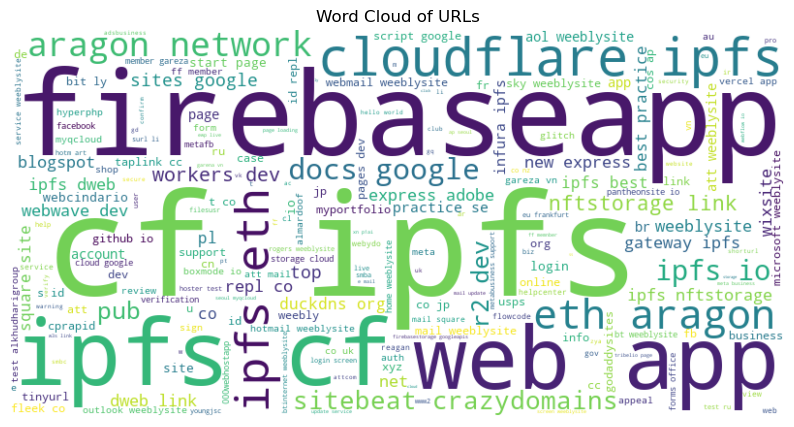

In [39]:
# Word Cloud malicious
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(malicious['domain']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of URLs')
plt.show()

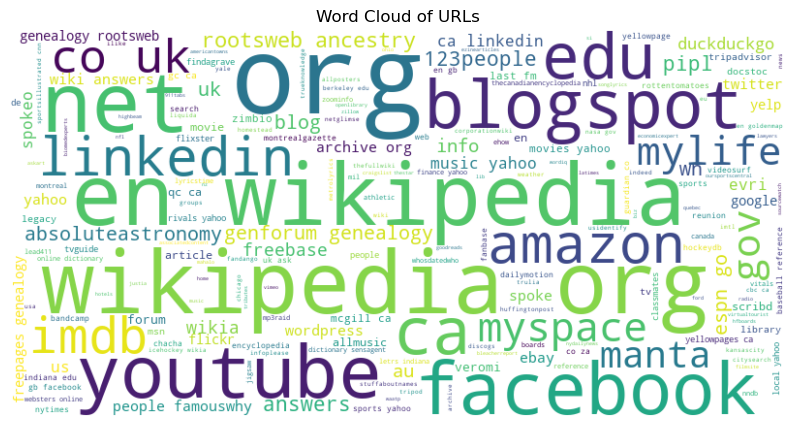

In [40]:
# Word Cloud benign
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(benign['domain']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of URLs')
plt.show()

In [41]:
# Counting the number of '-' symbol for each instance
no_hyphen = urldata.has_hyphen.value_counts()
no_hyphen

has_hyphen
0    7620
1    2380
Name: count, dtype: int64

### 🧮 Counting of Special Characters 🧮

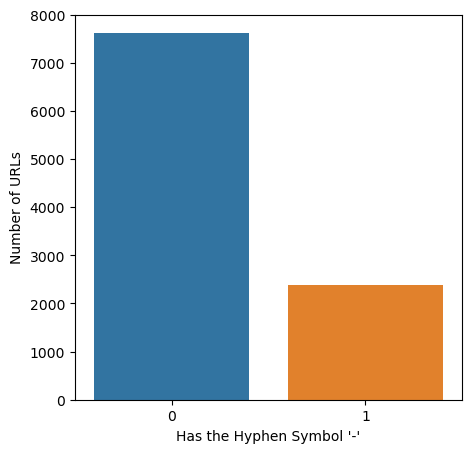

In [42]:
# Plotting the number of instances that have or have not the '-' symbol
plt.figure(figsize=(5, 5))
sns.barplot(x=no_hyphen.index, y=no_hyphen)
plt.xlabel('Has the Hyphen Symbol \'-\'');
plt.ylabel('Number of URLs');

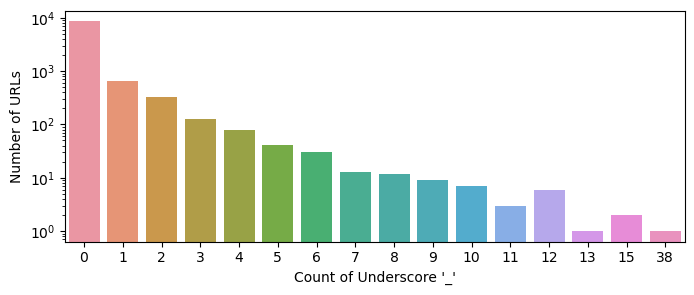

In [43]:
# Counting the number of '_' symbol for each instance
count_underscore = urldata.underscore_count.value_counts()
# Plotting the number of instances that have a certain count of '_' symbol
plt.figure(figsize=(8,3))
sns.barplot(x=count_underscore.index, y=count_underscore)
plt.yscale('log');
plt.xlabel('Count of Underscore \'_\'');
plt.ylabel('Number of URLs');

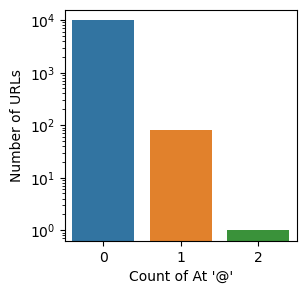

In [44]:
# Counting the number of '@' symbol for each instance
count_at = urldata.ats_count.value_counts()
# Plotting the number of instances that have a certain count of '@' symbol
plt.figure(figsize=(3, 3))
sns.barplot(x=count_at.index, y=count_at)
plt.yscale('log');
plt.xlabel('Count of At \'@\'');
plt.ylabel('Number of URLs');

### 🗺️ Geographical View on CCTLDs 🗺️

In [45]:
import folium
from geopy.geocoders import Photon
from IPython.display import display

In [46]:
# Have a brief view on cctld's
count_cctld = urldata.cctld.value_counts()
print(count_cctld)

cctld
Global                            8832
British Indian Ocean Territory     218
Canada                             133
Colombia                           102
United Kingdom                      71
                                  ... 
Saudi Arabia                         1
Ukraine                              1
Anguilla                             1
Tanzania                             1
Tunisia                              1
Name: count, Length: 100, dtype: int64


In [47]:
global_map = folium.Map(location=[0, 0], zoom_start=2)
geolocator = Photon(user_agent="malicious_url_detection")

# Add markers
for country, cases in count_cctld.items():
    try:
        location = geolocator.geocode(country)
        if location:
            folium.Marker(
                location=[location.latitude, location.longitude],
                popup=f"{country}: {cases} cases",
            ).add_to(global_map)
    except:
        continue
display(global_map)

In [48]:
import plotly.graph_objects as go

In [49]:
# Count the cctld's
cctld_counts = urldata['cctld'].value_counts()

# Filter Global
if 'Global' not in cctld_counts.index:
    cctld_counts['Global'] = 0

# Create new dataframe
data = pd.DataFrame({'region': cctld_counts.index, 'count': cctld_counts.values})

# Colorscale Yellow-Orange-Red
colorscale = 'YlOrRd'  

# Create a geographical heat map 
fig = go.Figure(data=go.Choropleth(
    locations=data['region'],
    z=data['count'],
    locationmode='country names',
    colorscale=colorscale,
    autocolorscale=True,  
    marker_line_color='white',
    colorbar_title='Count',
    zmin = 0,
    zmax = 150
))

# Update
fig.update_layout(title_text='Distribution of Country-Code Top Level Domains')

# Show
fig.show()

### 🛜 Use of the HTTPS Protocol 🛜

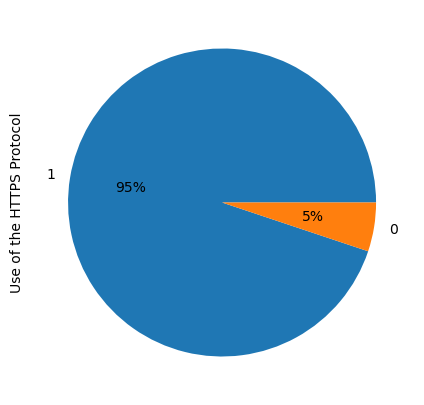

In [50]:
#Plot using cake plot the ip bare feature
plt.figure(figsize=(5, 5))
urldata.have_https.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('Use of the HTTPS Protocol');

## 📊 Normalization Process 📊

Before moving to the 'Data Processing' steps, a few considerations have to be made about the specific values of our data collected so far. The measurement unit used can affect the data analysis. 

- For example, changing measurement units from meters to inches for height, or from kilograms to pounds for weight, may lead to very different results. 

- In general, expressing an attribute in smaller units will lead to a larger range for that attribute, and thus tend to give such an attribute greater effect or “weight.” To help avoid dependence on the choice of measurement units, the data should be normalized or standardized. This involves transforming the data to fall within a smaller or common range.

The technique used so far is the "z-score normalization" (or zero-mean normalization), where the values for an attribute 'A' are normalized based on the *mean* (i.e., average) and *standard deviation* of 'A'. The reason behind this choice lies on the fact that this method is useful when the actual minimum and maximum of attribute 'A' are unknown, or when there are outliers that dominate the min-max normalization. 

- It's straightforward to demonstrate that, for most of the features extracted (such as the length of an URL, or the count of a certain character), the actual minimums and maximums are unknown or undefinable.

**Bibliographic References:**

- Jiawei, H., Micheline, K., Jian, P., "Data Mining: Concepts and Techniques", 3rd edition. Morgan Kaufmann 2011, ISBN 978-0123814791

In [51]:
#Convert the categorical cctld data into numerical data [0,1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
urldata['cctld'] = le.fit_transform(urldata['cctld'])

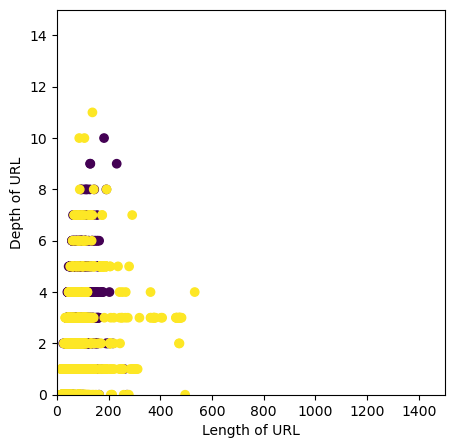

In [52]:
#scatter plot before normalization
plt.figure(figsize=(5, 5))
plt.scatter(urldata.length, urldata.depth, c=urldata.label)
plt.xlabel('Length of URL')
plt.ylabel('Depth of URL')
plt.xlim(0, 1500)
plt.ylim(0, 15)
plt.show()


In [53]:
from scipy.stats import zscore

In [54]:
# Calculate the zscores and drop zscores into new column
for feature in ['cctld', 'length', 'ats_count', 'underscore_count', 'depth']:
    urldata[feature] = zscore(urldata[feature])

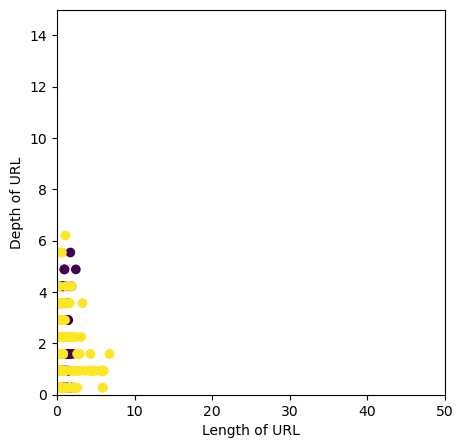

In [55]:
#scatter plot before normalization
plt.figure(figsize=(5, 5))
plt.scatter(urldata.length, urldata.depth, c=urldata.label)
plt.xlabel('Length of URL')
plt.ylabel('Depth of URL')
plt.xlim(0, 50)
plt.ylim(0, 15)
plt.show()


In [56]:
urldata

url  \
0     https://www.freebase.com/view/en/ronald_ridenhour   
1                    https://www.onticmedia.com/poetry/   
2     https://www.markets.financialcontent.com/stock...   
3     https://www.ask.com/food/Bread/A-Good-Bread-Ma...   
4     https://www.historymedren.about.com/library/wh...   
...                                                 ...   
9995            https://factureassa.wixsite.com/my-site   
9996  https://dmanlket.com/?gclid=dmarket.com-ingame...   
9997  https://cloudflare-ipfs.com/ipfs/bafybeieptmxa...   
9998                      http://awvvjgfbzz.duckdns.org   
9999          https://mecconnect-8669d.firebaseapp.com/   

                                domain     cctld    length  have_https  \
0                     www.freebase.com -0.076939 -0.190714           1   
1                   www.onticmedia.com -0.076939 -0.406389           1   
2     www.markets.financialcontent.com -0.076939  1.333396           1   
3                          www.ask.com -0.076939  0.211881           1   
4          www.historymedren.about.com -0.076939  0.010584           1   
...                                ...       ...       ...         ...   
9995           factureassa.wixsite.com -0.076939 -0.334497           1   
9996                      dmanlket.com -0.076939  0.154368           1   
9997               cloudflare-ipfs.com -0.076939  0.600098           1   
9998            awvvjgfbzz.duckdns.org -0.076939 -0.478281           0   
9999  mecconnect-8669d.firebaseapp.com -0.076939 -0.305741           1   

      have_ip  has_hyphen  ats_count  underscore_count     depth  label  
0           0           0   -0.08983          0.653192  0.932857      0  
1           0           0   -0.08983         -0.269787 -0.383994      0  
2           0           0   -0.08983          8.037022  3.566558      0  
3           0           0   -0.08983         -0.269787  0.932857      0  
4           0           0   -0.08983         -0.269787  0.932857      0  
...       ...         ...        ...               ...       ...    ...  
9995        0           0   -0.08983         -0.269787 -0.383994      1  
9996        0           0   -0.08983         -0.269787 -1.042419      1  
9997        0           1   -0.08983         -0.269787  0.932857      1  
9998        0           0   -0.08983         -0.269787 -1.042419      1  
9999        0           1   -0.08983         -0.269787 -1.042419      1  

[10000 rows x 11 columns]

## 🧪  Feature Selection 🧪

Data reduction techniques can be applied to obtain a *reduced representation* of the data set that is much smaller in volume, yet closely maintains the integrity of the original data. That is, mining on the reduced data set should be more efficient yet produce the same (or almost the same) analytical results. 

Data reduction strategies include **dimensionality reduction**, numerosity reduction, and data compression. We will apply techniques of dimensionality reduction by a feature selection process.

- For this specific purpose, our idea was to group feature that are semantically similar, that's to say, in our case, features that deal with special characters, and later evaluating if the analytical results produced are somehow similar.

**Bibliographic References:**

- Jiawei, H., Micheline, K., Jian, P., "Data Mining: Concepts and Techniques", 3rd edition. Morgan Kaufmann 2011, ISBN 978-0123814791

In [57]:
# Features that deal with special characters
special_chars_feats = ['has_hyphen', 'ats_count', 'underscore_count', 'depth']
# Drop special chars features + label (for maintaining ordering)
urldata_fs = urldata.drop(special_chars_feats, axis=1)
urldata_fs = urldata_fs.drop('label', axis=1)

In [58]:
# Returns the count of special chars
def special_chars_count(url):
    return url.count('-')+url.count('@')+url.count('_')+url.count('/')

In [59]:
# Add count of special chars + label (ordered)
urldata_fs['special_chars'] = urldata_fs['url'].apply(special_chars_count)
urldata_fs['label'] = urldata['label']

In [60]:
# Overview before normalization
urldata_fs

url  \
0     https://www.freebase.com/view/en/ronald_ridenhour   
1                    https://www.onticmedia.com/poetry/   
2     https://www.markets.financialcontent.com/stock...   
3     https://www.ask.com/food/Bread/A-Good-Bread-Ma...   
4     https://www.historymedren.about.com/library/wh...   
...                                                 ...   
9995            https://factureassa.wixsite.com/my-site   
9996  https://dmanlket.com/?gclid=dmarket.com-ingame...   
9997  https://cloudflare-ipfs.com/ipfs/bafybeieptmxa...   
9998                      http://awvvjgfbzz.duckdns.org   
9999          https://mecconnect-8669d.firebaseapp.com/   

                                domain     cctld    length  have_https  \
0                     www.freebase.com -0.076939 -0.190714           1   
1                   www.onticmedia.com -0.076939 -0.406389           1   
2     www.markets.financialcontent.com -0.076939  1.333396           1   
3                          www.ask.com -0.076939  0.211881           1   
4          www.historymedren.about.com -0.076939  0.010584           1   
...                                ...       ...       ...         ...   
9995           factureassa.wixsite.com -0.076939 -0.334497           1   
9996                      dmanlket.com -0.076939  0.154368           1   
9997               cloudflare-ipfs.com -0.076939  0.600098           1   
9998            awvvjgfbzz.duckdns.org -0.076939 -0.478281           0   
9999  mecconnect-8669d.firebaseapp.com -0.076939 -0.305741           1   

      have_ip  special_chars  label  
0           0              6      0  
1           0              4      0  
2           0             18      0  
3           0             11      0  
4           0              5      0  
...       ...            ...    ...  
9995        0              4      1  
9996        0              9      1  
9997        0              7      1  
9998        0              2      1  
9999        0              4      1  

[10000 rows x 8 columns]

In [61]:
# Normalizing
for feature in ['cctld', 'length', 'special_chars']:
    urldata_fs[feature] = zscore(urldata_fs[feature])

In [62]:
# Overview after normalization
urldata_fs

url  \
0     https://www.freebase.com/view/en/ronald_ridenhour   
1                    https://www.onticmedia.com/poetry/   
2     https://www.markets.financialcontent.com/stock...   
3     https://www.ask.com/food/Bread/A-Good-Bread-Ma...   
4     https://www.historymedren.about.com/library/wh...   
...                                                 ...   
9995            https://factureassa.wixsite.com/my-site   
9996  https://dmanlket.com/?gclid=dmarket.com-ingame...   
9997  https://cloudflare-ipfs.com/ipfs/bafybeieptmxa...   
9998                      http://awvvjgfbzz.duckdns.org   
9999          https://mecconnect-8669d.firebaseapp.com/   

                                domain     cctld    length  have_https  \
0                     www.freebase.com -0.076939 -0.190714           1   
1                   www.onticmedia.com -0.076939 -0.406389           1   
2     www.markets.financialcontent.com -0.076939  1.333396           1   
3                          www.ask.com -0.076939  0.211881           1   
4          www.historymedren.about.com -0.076939  0.010584           1   
...                                ...       ...       ...         ...   
9995           factureassa.wixsite.com -0.076939 -0.334497           1   
9996                      dmanlket.com -0.076939  0.154368           1   
9997               cloudflare-ipfs.com -0.076939  0.600098           1   
9998            awvvjgfbzz.duckdns.org -0.076939 -0.478281           0   
9999  mecconnect-8669d.firebaseapp.com -0.076939 -0.305741           1   

      have_ip  special_chars  label  
0           0       0.181012      0  
1           0      -0.450132      0  
2           0       3.967880      0  
3           0       1.758874      0  
4           0      -0.134560      0  
...       ...            ...    ...  
9995        0      -0.450132      1  
9996        0       1.127729      1  
9997        0       0.496585      1  
9998        0      -1.081277      1  
9999        0      -0.450132      1  

[10000 rows x 8 columns]

# ⛏️ Data Mining ⛏️

Data mining is a crucial component of Machine Learning (ML) that focuses on discovering valuable patterns, insights, and knowledge from large datasets. It involves applying various techniques to extract meaningful information and uncover hidden patterns within the data. In way to accomplish this, we leveraged a number of models encountered so far in our studies, nonetheless the most famous ones according to the recent literature:

- **Decision Tree Classifier**: a supervised machine learning algorithm used for classification tasks. It works by partitioning the data into subsets based on the values of input features. These partitions form a tree-like structure, where each internal node represents a feature, each branch represents a decision, and each leaf node corresponds to a class label. The algorithm makes decisions by following a path from the root to a leaf node based on feature values;

- **Random Forest Classifier**: an ensemble learning method that combines multiple Decision Trees to make more accurate predictions. It works by creating a collection of Decision Trees during training and then aggregating their predictions to make a final decision. This ensemble approach helps reduce overfitting and improve the overall performance of the model;

- **Logistic Regression**: a linear classification algorithm used for binary and multi-class classification problems. It models the probability of an instance belonging to a particular class as a function of the input features. It uses the logistic function to transform the output into a probability, making it suitable for tasks where you want to predict a categorical outcome;

- **Gaussian Naive Bayes**: a probabilistic classifier based on the Naive Bayes theorem. It assumes that features are statistically independent within each class and models the distribution of each feature using a Gaussian distribution. This classifier is particularly useful when dealing with continuous data and is often employed for text classification and spam filtering;

- **Linear SVC** (Linear Support Vector Classifier): a type of Support Vector Machine (SVM) used for binary and multi-class classification. It seeks to find the optimal hyperplane that best separates data points belonging to different classes in a high-dimensional space.

Straightforwardly, each of the model listed up until now have several advantages and disadvantages, which can be explored with the assist of the available literature and papers focusing on this topic. In spite of that, the aim we claim to have is to concern ourselves with the results provided by the metrics obtained, and lend a justification on the overall performances. Precisely, the metrics we have picked for guiding our work are:

- **Accuracy**: the percentage of test set tuples that are correctly classified by the classifier, that is, accuracy = (TP + TN) / (P + N).

- **Precision**: can be thought of as a measure of exactness (i.e., what percentage of tuples labeled as positive are actually such), that is, precision = TP / (TP + FP).

- **Recall**: is a measure of completeness (what percentage of positive tuples are labeled as such), that is, recall = TP / (TP + FN) = TP / P.

- **F1-Score**: an alternative way to use precision and recall is to combine them into a single measure, that is, F = (2 • precision • recall) / (precision + recall).

It's forthright to notify that, in presence of the class imbalance problem we've already discussed about, where the main class of interest (maliciousness of an URL) is rare, the last three metrics are of huge help, because they reflect better the quality of our trained model than what accuracy alone can do. We again recall that we've solved correctly the class imbalance problem, hence accuracy itself is already sufficient for our model estimation. 

**Bibliographic References:**

- Jiawei, H., Micheline, K., Jian, P., "Data Mining: Concepts and Techniques", 3rd edition. Morgan Kaufmann 2011, ISBN 978-0123814791

## 🎱 Holdout Method 🎱

The Holdout Method is a common technique in Machine Learning for training a model and assessing the accuracy, eventually hinting to a further step of model selection, where we may choose one classifier over another. In line with this strategy, the given data are randomly partitioned into two independent sets, a training set and a test set, where typically two-thirds of the data are allocated to the training set, and the remaining one-third is allocated to the test set.

- **Training Set**: The training set is utilized during the training phase to enhance the model's experience. It is here that an optimization procedure is employed to identify the parameter configuration that minimizes the training error. This set essentially serves as the "playground" where the model learns from the data.

- **Test Set**: The test set is reserved for evaluating the real-world performance and generalization capability of the model. It provides an unbiased assessment of how well the model can make predictions on unseen data. By assessing the model with the test set, one can gauge its ability to perform beyond the data it was trained on.

The holdout method is crucial for assessing a model's performance and ensuring it can make accurate predictions on new, unseen data. It helps in detecting issues like overfitting (where the model performs exceptionally well on the training data but poorly on new data) and provides a more realistic estimate of the model's effectiveness in practical applications.

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

#SKF validation move import in the correct place
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_validate

In [64]:
# Remove categorical features from both urldata and urldata_fs
urldata = urldata.drop(['domain', 'url'], axis=1)
urldata_fs = urldata_fs.drop(['domain', 'url'], axis=1)

In [65]:
# Separating data and ground truth
X = urldata.drop(['label'],axis=1)
y = urldata['label']

In [66]:
# Instantiating training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2)

#############################################
######-Model => ('DecisionTreeClassifier', DecisionTreeClassifier()) 
Test Accuracy :  85.20%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.87      0.82      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

             Confusion_matrix 


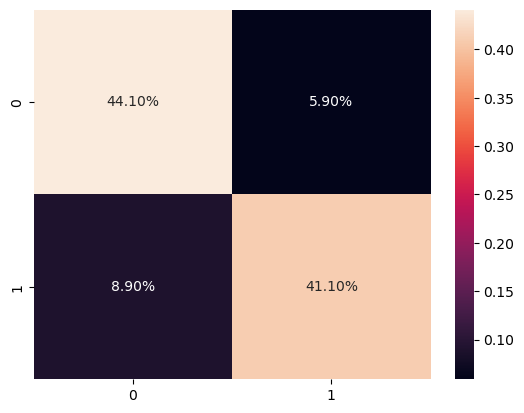

###################- End -###################
#############################################
######-Model => ('RandomForestClassifier', RandomForestClassifier()) 
Test Accuracy :  86.05%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.88      0.84      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

             Confusion_matrix 


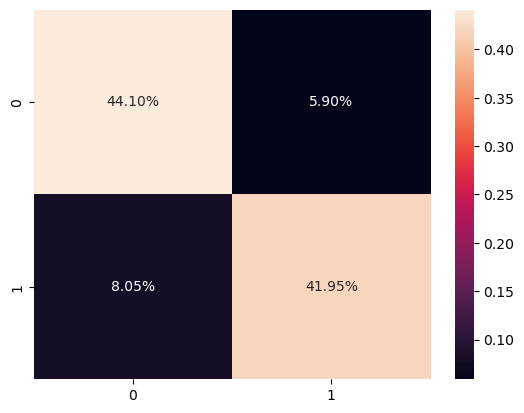

###################- End -###################
#############################################
######-Model => ('LogisticRegression', LogisticRegression(max_iter=1000, n_jobs=-1)) 
Test Accuracy :  76.35%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      1000
           1       0.83      0.66      0.74      1000

    accuracy                           0.76      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.76      0.76      2000

             Confusion_matrix 


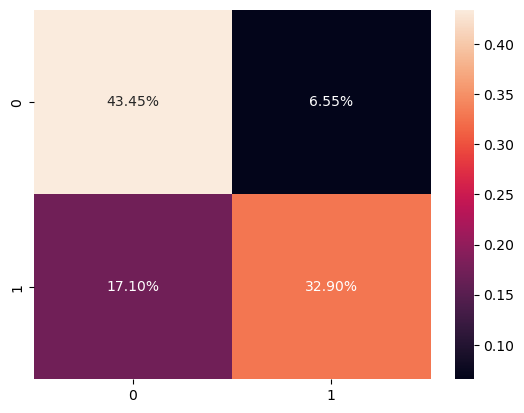

###################- End -###################
#############################################
######-Model => ('LinearSVC', LinearSVC(dual=False, max_iter=10000)) 
Test Accuracy :  74.95%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1000
           1       0.86      0.60      0.71      1000

    accuracy                           0.75      2000
   macro avg       0.77      0.75      0.74      2000
weighted avg       0.77      0.75      0.74      2000

             Confusion_matrix 


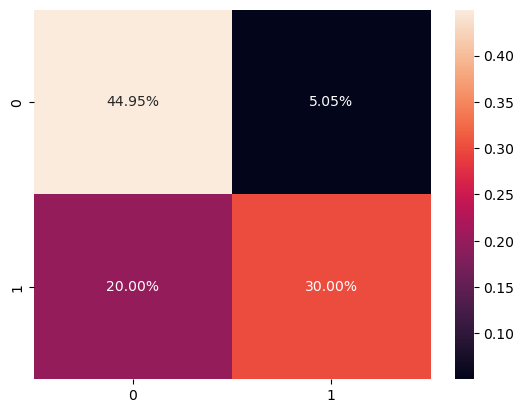

###################- End -###################
#############################################
######-Model => ('GaussianNB', GaussianNB()) 
Test Accuracy :  55.80%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1000
           1       0.99      0.12      0.21      1000

    accuracy                           0.56      2000
   macro avg       0.76      0.56      0.45      2000
weighted avg       0.76      0.56      0.45      2000

             Confusion_matrix 


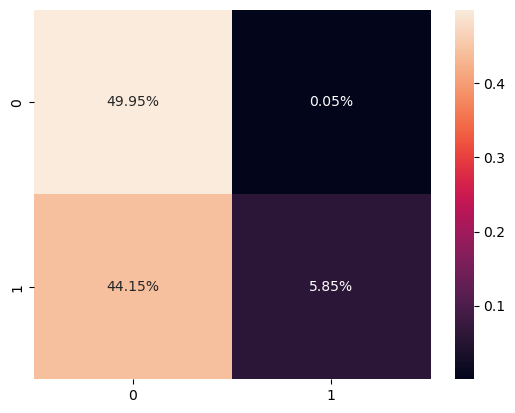

###################- End -###################


In [67]:
# Instantiating Models

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression(n_jobs=-1, max_iter=1000)
gnb = GaussianNB()
svc = LinearSVC(dual=False, max_iter=10000)

models = [("DecisionTreeClassifier",dt),("RandomForestClassifier",rf),
          ("LogisticRegression",lr),("LinearSVC",svc),("GaussianNB",gnb)]

# Holdout

accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m[1]
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

### Training with feature selection dataset

Using the dataset obtained from the feature selection step we perform the same procedure of training. We decided to try this road in order to test different approaches and find which suits most the problem.

In [68]:
# Separating data and ground truth
Xfs = urldata_fs.drop(['label'],axis=1)
yfs = urldata_fs['label']

In [69]:
# Instantiating training and test set
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs, yfs, test_size=0.2, shuffle=True, random_state=2)

#############################################
######-Model => ('DecisionTreeClassifier', DecisionTreeClassifier()) 
Test Accuracy :  77.70%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.80      0.73      0.77      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

             Confusion_matrix 


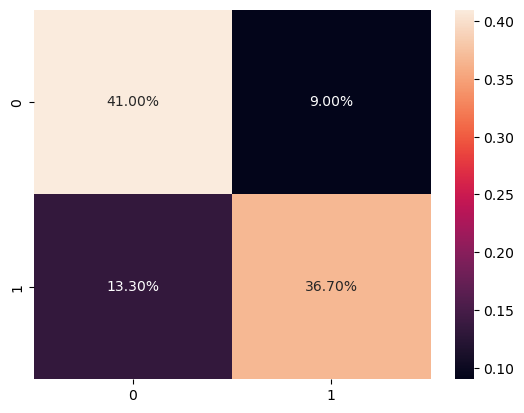

###################- End -###################
#############################################
######-Model => ('RandomForestClassifier', RandomForestClassifier()) 
Test Accuracy :  77.85%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.80      0.74      0.77      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

             Confusion_matrix 


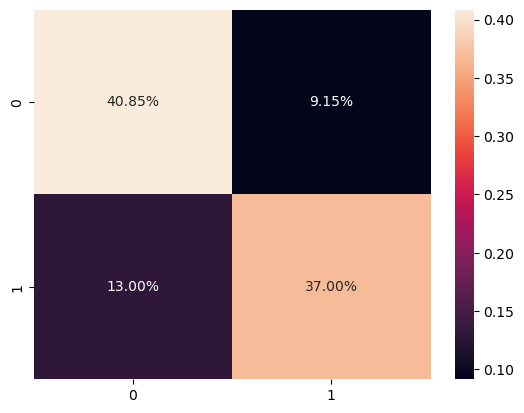

###################- End -###################
#############################################
######-Model => ('LogisticRegression', LogisticRegression(max_iter=1000, n_jobs=-1)) 
Test Accuracy :  66.55%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.68      0.64      0.65      1000

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

             Confusion_matrix 


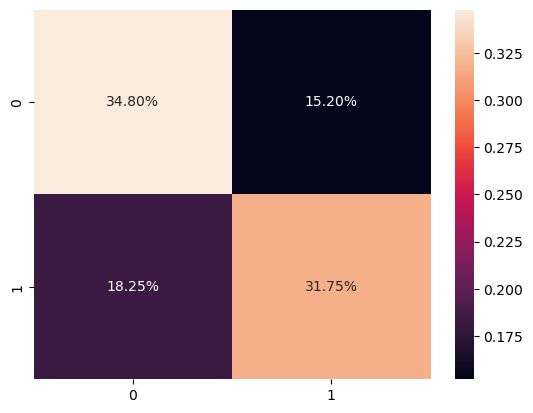

###################- End -###################
#############################################
######-Model => ('LinearSVC', LinearSVC(dual=False, max_iter=10000)) 
Test Accuracy :  67.00%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.65      0.72      0.69      1000
           1       0.69      0.62      0.65      1000

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

             Confusion_matrix 


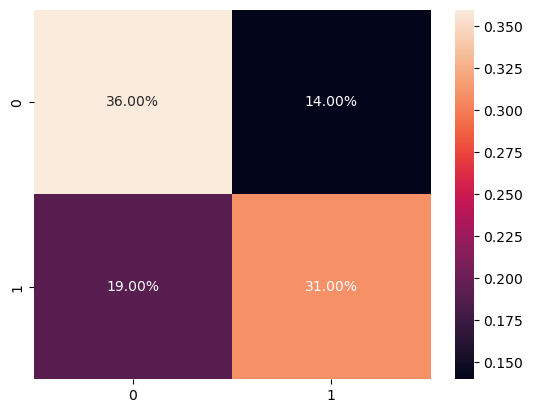

###################- End -###################
#############################################
######-Model => ('GaussianNB', GaussianNB()) 
Test Accuracy :  55.20%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1000
           1       1.00      0.10      0.19      1000

    accuracy                           0.55      2000
   macro avg       0.76      0.55      0.44      2000
weighted avg       0.76      0.55      0.44      2000

             Confusion_matrix 


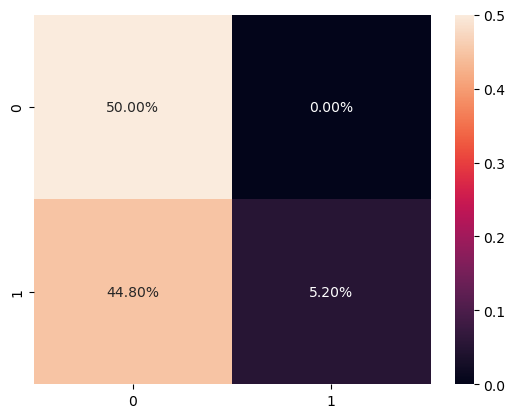

###################- End -###################


In [70]:
# Instantiating Models

dt_fs = DecisionTreeClassifier()
rf_fs = RandomForestClassifier()
lr_fs = LogisticRegression(n_jobs=-1, max_iter=1000)
gnb_fs = GaussianNB()
svc_fs = LinearSVC(dual=False, max_iter=10000)

models_fs = [("DecisionTreeClassifier",dt_fs),("RandomForestClassifier",rf_fs),
          ("LogisticRegression",lr_fs),("LinearSVC",svc_fs),("GaussianNB",gnb_fs)]

# Holdout

accuracy_test_fs=[]
for m in models_fs:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m[1]
    model_.fit(Xfs_train, yfs_train)
    pred = model_.predict(Xfs_test)
    acc = accuracy_score(pred, yfs_test)
    accuracy_test_fs.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(yfs_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(yfs_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

## 🗂️ Stratified K-Fold 🗂️

In k-fold cross-validation, the initial data are randomly partitioned into k mutually exclusive subsets or “folds”, D1, D2,..., Dk, each of approximately equal size. Training and testing is performed k times. In iteration i, partition Di is reserved as the test set, and the remaining partitions are collectively used to train the model. That is, in the first iteration, subsets D2,..., Dk collectively serve as the training set to obtain a first model, which is tested on D1; the second iteration is trained on subsets D1, D3,..., Dk and tested on D2; and so on. 

- For what regards the main design choice for this technique, that is deciding about the value of 'k', we agreed that k = 10 is a satisfying preference, supported by the opinion of the ML community and the literature (reference below)

**Bibliographic References:**

- Jiawei, H., Micheline, K., Jian, P., "Data Mining: Concepts and Techniques", 3rd edition. Morgan Kaufmann 2011, ISBN 978-0123814791
- The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2nd Edition. Springer Series in Statistics, Springer 2009, ISBN 9780387848570, pp. I-XXII, 1-745

Also, we were inspired by a careful observation, available on the Data Science Stack Exchange Forum, https://datascience.stackexchange.com/q/75789.

In [71]:
skfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
results_skf = []

for name, cls in models:
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    scores=cross_validate(pipe,
                         X_train,
                         y_train,
                         scoring = {'Precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                                    'Recall': make_scorer(recall_score, average = 'weighted'),
                                    'F1-score': make_scorer(f1_score, average = 'weighted'),
                                    'Accuracy': make_scorer(accuracy_score)},
                         return_estimator = False,
                         cv = skfold,
                         n_jobs = -1)
    results_skf.append((name, scores))

In [72]:
for r in results_skf:
    print(r[0])
    metrics = ['Accuracy','Precision', 'Recall', 'F1-score']
    for metric in metrics:
        print(f'{metric:20}', np.round(r[1]["test_"+metric].mean(),3), [np.round(elem,3) for elem in r[1]["test_"+metric]])
    print("\n")

DecisionTreeClassifier
Accuracy             0.842 [0.846, 0.842, 0.855, 0.819, 0.841, 0.836, 0.845, 0.848, 0.838, 0.854]
Precision            0.844 [0.847, 0.843, 0.856, 0.82, 0.842, 0.841, 0.847, 0.848, 0.839, 0.854]
Recall               0.842 [0.846, 0.842, 0.855, 0.819, 0.841, 0.836, 0.845, 0.848, 0.838, 0.854]
F1-score             0.842 [0.846, 0.842, 0.855, 0.819, 0.841, 0.836, 0.845, 0.847, 0.837, 0.854]


RandomForestClassifier
Accuracy             0.852 [0.854, 0.85, 0.864, 0.84, 0.846, 0.85, 0.861, 0.861, 0.831, 0.86]
Precision            0.852 [0.854, 0.85, 0.864, 0.841, 0.846, 0.852, 0.863, 0.862, 0.832, 0.861]
Recall               0.852 [0.854, 0.85, 0.864, 0.84, 0.846, 0.85, 0.861, 0.861, 0.831, 0.86]
F1-score             0.852 [0.854, 0.85, 0.864, 0.84, 0.846, 0.85, 0.861, 0.861, 0.831, 0.86]


LogisticRegression
Accuracy             0.736 [0.761, 0.715, 0.75, 0.738, 0.724, 0.724, 0.742, 0.741, 0.744, 0.719]
Precision            0.786 [0.812, 0.77, 0.801, 0.784, 0.752, 0.

# 📝 Final Report 📝

We now compare the two outputs from the diffent classifications (with and without SKF), in particular we focus on the accuracy.

In [73]:
accuracy_skf = []
for i in range(0,5):
    accuracy_skf.append(np.round(results_skf[i][1]['test_Accuracy'].mean(),3))

print(accuracy_test)

output = pd.DataFrame({"Model":["DecisionTreeClassifier","RandomForestClassifier", "LogisticRegression","LinearSVC","GaussianNB"],
                    "Accuracy":accuracy_test,"Accuracy with SKF":accuracy_skf,"Accuracy with Feature Selection":accuracy_test_fs})

[0.852, 0.8605, 0.7635, 0.7495, 0.558]


In [74]:
output

Model  Accuracy  Accuracy with SKF  \
0  DecisionTreeClassifier    0.8520              0.842   
1  RandomForestClassifier    0.8605              0.852   
2      LogisticRegression    0.7635              0.736   
3               LinearSVC    0.7495              0.740   
4              GaussianNB    0.5580              0.561   

   Accuracy with Feature Selection  
0                           0.7770  
1                           0.7785  
2                           0.6655  
3                           0.6700  
4                           0.5520

As we can see the metrics of the feature selection are very lowe compared to the other two, because of that we decided to test only the first two methods (Holdout and SKF).

## 💉 Wilcoxon Test 💉

Using the Wilcoxon Test we test the **null hypotesis** that **two related paired samples come from the same distribution**. Since the test compares couples of array, we use the accuray array obtained from the skf and test each model with the others.

***p*-value** is the probability of obtaining a value of the W statistic equal to or lower than the one actually observed, under the assumption that the null hypothesis is correct.

A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

In other words, given a confidence level $\alpha$ (typically 0.05), we can conclude that:

- if ***p*-value $ \leq \alpha$**, i reject the null hypothesis (with a confidence level of $\alpha$): result is said to be statistically significant. 
- if ***p*-value $ > \alpha$**, i cannot reject the null hypothesis.

In [75]:
from scipy.stats import wilcoxon

for r in results_skf:
    print("---------" + r[0] + "---------")
    current_acc_list = r[1]["test_Accuracy"]
    for to_compare in results_skf:
        if to_compare[0] != r[0]:
            print(to_compare[0])
            to_compare_acc_list = to_compare[1]["test_Accuracy"]
            stat, p = wilcoxon(current_acc_list, to_compare_acc_list)
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            if p > 0.05:
                print('Same distribution (fail to reject H0)')
            else:
                print('Different distribution (reject H0)')
            print("\n")




---------DecisionTreeClassifier---------
RandomForestClassifier
Statistics=2.500, p=0.006
Different distribution (reject H0)


LogisticRegression
Statistics=0.000, p=0.002
Different distribution (reject H0)


LinearSVC
Statistics=0.000, p=0.002
Different distribution (reject H0)


GaussianNB
Statistics=0.000, p=0.002
Different distribution (reject H0)


---------RandomForestClassifier---------
DecisionTreeClassifier
Statistics=2.500, p=0.010
Different distribution (reject H0)


LogisticRegression
Statistics=0.000, p=0.002
Different distribution (reject H0)


LinearSVC
Statistics=0.000, p=0.002
Different distribution (reject H0)


GaussianNB
Statistics=0.000, p=0.002
Different distribution (reject H0)


---------LogisticRegression---------
DecisionTreeClassifier
Statistics=0.000, p=0.002
Different distribution (reject H0)


RandomForestClassifier
Statistics=0.000, p=0.002
Different distribution (reject H0)


LinearSVC
Statistics=1.000, p=0.017
Different distribution (reject H0)


Gaussi

/home/fabio/anaconda3/envs/cyberLab/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.

/home/fabio/anaconda3/envs/cyberLab/lib/python3.9/site-packages/scipy/stats/_morestats.py:4102: UserWarning:

Sample size too small for normal approximation.



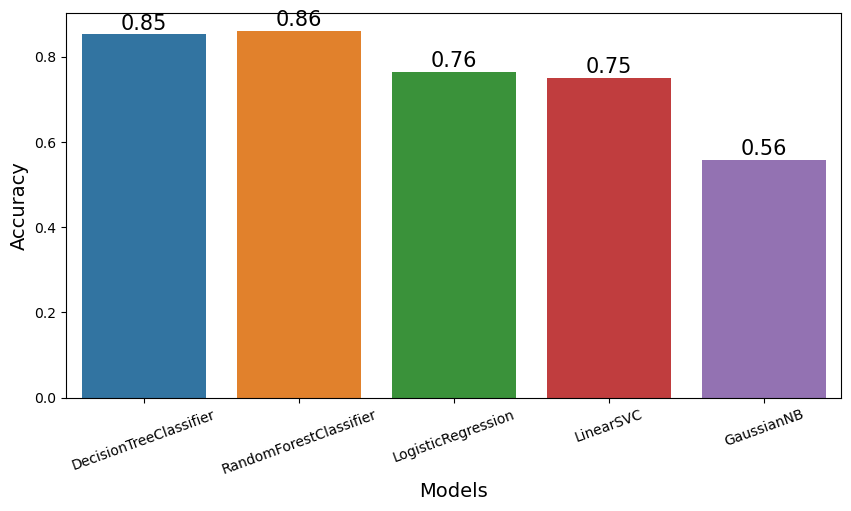

In [76]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

After the comparison we can see that the Random Forest Classifier and the Logistic Regression models performed the best in terms of accuracy, with both models achieving an accuracy of around 86%. The Decision Tree Classifier and the LinearSVC models also performed well, achieving an accuracy of around 75%. The GaussianNB model performed the worst, achieving an accuracy of around 56%. 

It is also worth noting that the Stratified K-Fold cross-validation method did not improve the accuracy of the models, and in fact, slightly decreased the accuracy compared to the normal classification method. This could be due to various factors such as:

- The data may not be well suited for stratification
- The Hyperparameters of the model may not be well-tuned for the SKF cross-validation
- Wrong number of folds, which could lead to overfitting underfitting


## 🌲 Considerations on Decision Tree 🌲

[Text(0.46, 0.9, 'has_hyphen <= 0.5\ngini = 0.5\nsamples = 8000\nvalue = [4000, 4000]\nclass = benign'),
 Text(0.22, 0.7, 'depth <= -0.713\ngini = 0.468\nsamples = 6078\nvalue = [3811, 2267]\nclass = benign'),
 Text(0.08, 0.5, 'have_https <= 0.5\ngini = 0.454\nsamples = 1510\nvalue = [526, 984]\nclass = malicious'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 167\nvalue = [0, 167]\nclass = malicious'),
 Text(0.12, 0.3, 'length <= -0.299\ngini = 0.477\nsamples = 1343\nvalue = [526, 817]\nclass = malicious'),
 Text(0.08, 0.1, '\n  (...)  \n'),
 Text(0.16, 0.1, '\n  (...)  \n'),
 Text(0.36, 0.5, 'length <= 0.478\ngini = 0.404\nsamples = 4568\nvalue = [3285, 1283]\nclass = benign'),
 Text(0.28, 0.3, 'length <= -0.471\ngini = 0.342\nsamples = 3844\nvalue = [3003, 841]\nclass = benign'),
 Text(0.24, 0.1, '\n  (...)  \n'),
 Text(0.32, 0.1, '\n  (...)  \n'),
 Text(0.44, 0.3, 'length <= 1.456\ngini = 0.476\nsamples = 724\nvalue = [282, 442]\nclass = malicious'),
 Text(0.4, 0.1, '\n  (...)  \n'),
 T

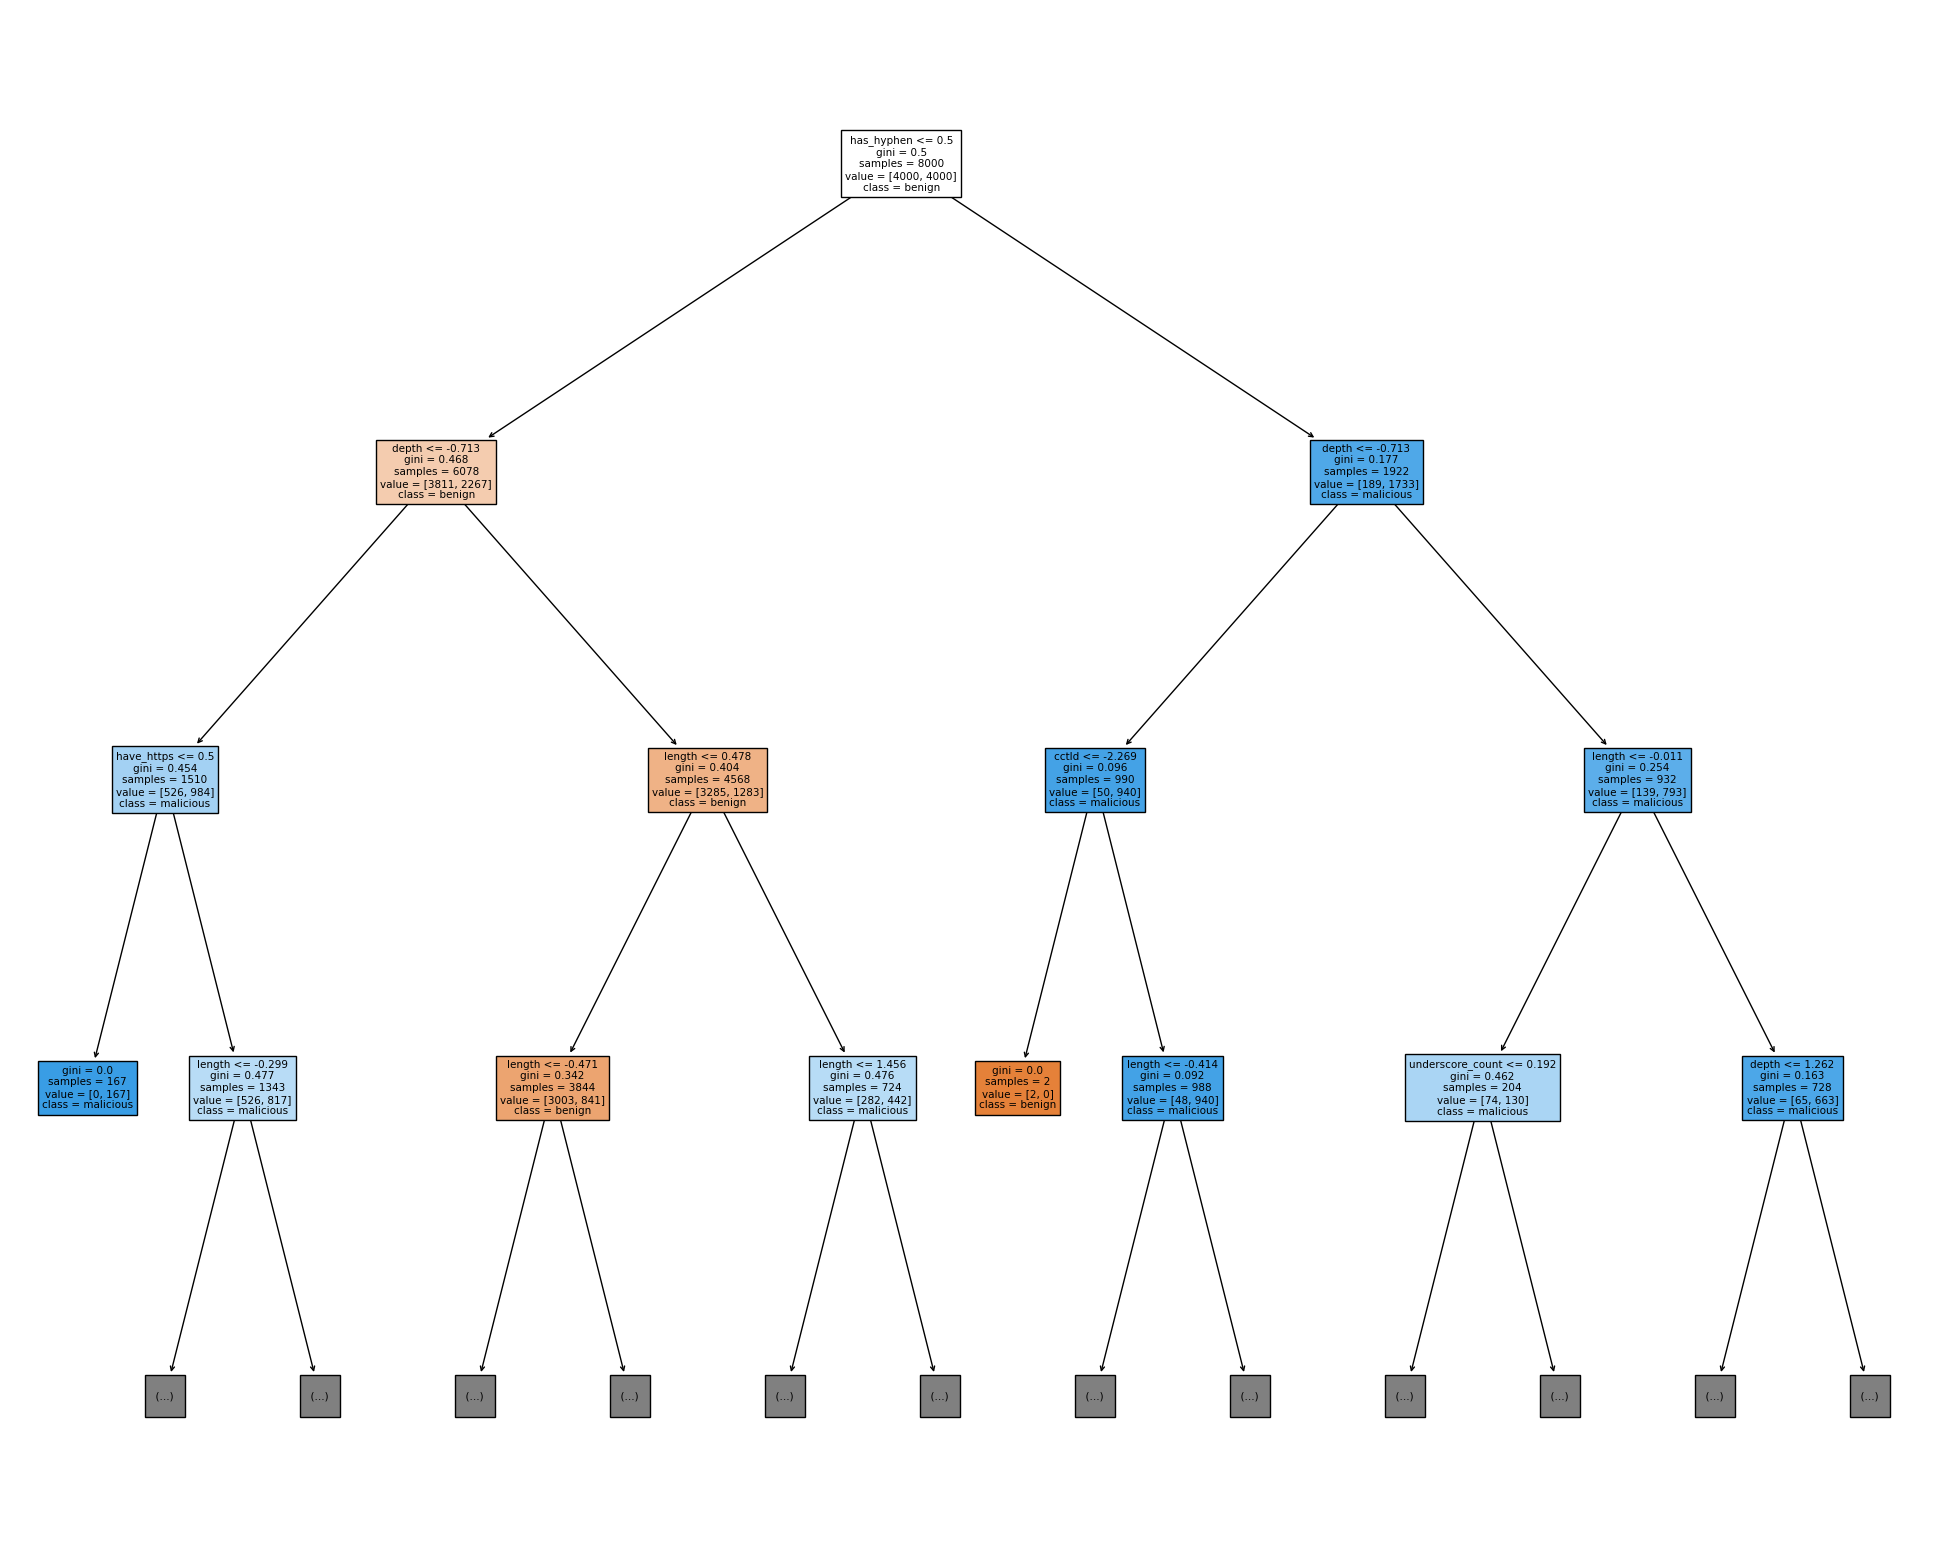

In [77]:
from sklearn import tree
# Fix size of plot
fig = plt.figure(figsize=(25,20))
# Plot our decision tree
tree.plot_tree(dt, 
               max_depth=3, 
               feature_names=['cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth'],
               class_names=['benign', 'malicious'],
               filled=True)

It's very interesting to notice the choice of attributes on the top-level part of our decision tree classifier. 

- **Hyphen Attribute**: As we could've expected, the 'hyphen' attribute immediately captures the attention, as it matches with the frequent cases of malicious URLs that have at least an occurrence of this character in the domain part.  

- **Depth of an URL**: Furthermore, we can see how the depth of an URLs can be a good discriminating factor in deciding whether an URL is untrusted or not, as it accomplishes in obfuscating the true destination of the URL

- **Other Features**: Other features that are worthy to mention are the CCTLDs, upon which further works can be conducted on the correlation between certain CCTLDs and malicious URLs; inevitably, the length of an URL, which is a relevant feature as we've expected in detecting dangerous cases; and, finally, the count of underscores, another special character that needs to be studied

# ⚙️ System Improvement ⚙️

At this point, coherently with the results discussed in the previous section, we explored various models, identifying some solutions as more reliable than others. Nevertheless, it is necessary to note some observations on the potential future improvements that our algorithm could benefit from.

## 🏗️ Other Features? 🏗️

Interestingly to say, there are plenty of features that characterize a URL, many of which are correlated with the active behavior of the resource identified and localized by the URL. Although it was our choice to focus on attributes based on the address structure itself, it is in the code that many potential symptoms of malicious behavior can be detected. 

- **HTML encoding**, for example, can be used to include HTML elements within a URL. While this is not a standard practice, it's technically possible. Malicious actors might attempt to exploit this to embed harmful scripts or elements in a URL.
- **JavaScript code** can be used directly in the URL itself (often referred to as a "javascript: URL") to execute scripts. This can be abused by attackers to carry out various actions, including redirecting users to phishing pages, stealing cookies, or executing malicious code.

Definitely, augmenting our work with even more features would help in identifying and differentiate the definition of maliciousness, as far as URLs are concerned.

### 🖥️ Computational Aspects 🖥️

Unfortunately, it requires a mix of several techniques to accomplish this result. 

1. First of all, it's quite rare to retrieve a patched, up-to-date, tested database of malicious URLs, from which the code could be engineered from. 

2. Secondly, we have to face the timeout problem, referring to the issue of a web page taking too long to load, which would inevitably sharpen our already difficult to retrieve database of malicious URLs.

New studies are emerging in terms of **request parallelization**, a solution that is taking hold in the field of ML. 

- Request parallelization in Machine Learning (ML) refers to the practice of simultaneously processing multiple data points or requests in a parallel manner. This technique is employed to improve the efficiency and speed of ML model predictions or training. It requires careful consideration of hardware resources, algorithm design, and system architecture to achieve optimal performance.

Perhaps, this technique could represent a way for enhancing our work with further quality, and thus obtaining more satisfying results.

# 🕹️ Test Yourself on New URLs 🕹️

In [122]:
'''
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression(n_jobs=-1, max_iter=1000)
gnb = GaussianNB()
svc = LinearSVC(dual=False, max_iter=10000)
'''

feature_names = ['url', 'domain', 'cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth', 'label']

#Extracting the feautres & storing them in a list
example_features = []
label = 0 # benign

# Take an URL of example and get the features
url = "https://www.google.com/login"
example_features.append(extract_feaures(url,label))

# Create Example Dataframe
example = pd.DataFrame(example_features, columns= feature_names)

# Convert the categorical cctld data into numerical data [0,1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
example['cctld'] = le.fit_transform(example['cctld'])

# Remove domain and url
example = example.drop(['domain', 'url'], axis=1)

In [123]:
example

cctld  length  have_https  have_ip  has_hyphen  ats_count  \
0      0      28           1        0           0          0   

   underscore_count  depth  label  
0                 0      1      0

In [124]:
# Decision Tree
dt_predict = dt.predict(example.drop(columns=['label']))
print(dt_predict)

[1]


In [125]:
# Random Forest
rf_predict = rf.predict(example.drop(columns=['label']))
print(rf_predict)

[1]


In [109]:
# Linear Regression
lr_predict = lr.predict(example.drop(columns=['label']))
print(lr_predict)

[1]


In [90]:
# Gaussian NB
gnb_predict = gnb.predict(example.drop(columns=['label']))
print(gnb_predict)

[1]


In [91]:
# Linear SVC 
svc_predict = svc.predict(example.drop(columns=['label']))
print(svc_predict)

[1]
